<a href="https://colab.research.google.com/github/szkjiro/program/blob/main/BenfordPrefPopulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ベンフォードの法則と都道府県人口：対数目盛プロットによる視覚化

ベンフォードの法則は、多くの自然現象や社会現象に当てはまる統計法則です。これは、数字の最初の桁が1である確率が約30％、数字の最初の桁が9である確率が約5％である というものです。
この法則は、様々な分野で応用されていますが、今回は都道府県の人口 を例に、対数目盛プロットを用いて視覚化してみましょう。

なお、以下のPythonコードは、以下で作成したグラフを作成するようChatGPT Plusに指示して作成したものをもとに修正したものです。

また、このベンフォードの法則に関する説明は、Geminiに指示して作成したものをもとに修正したものです。

## データ
2023年1月1日時点の総務省統計局「人口動態統計」に基づき、各都道府県の人口を利用します。

## 対数目盛プロット
これらのデータを対数目盛プロットを用いて視覚化します。ある値を境に、左右それぞれでは概ね均等に分布しているように見えないでしょうか。


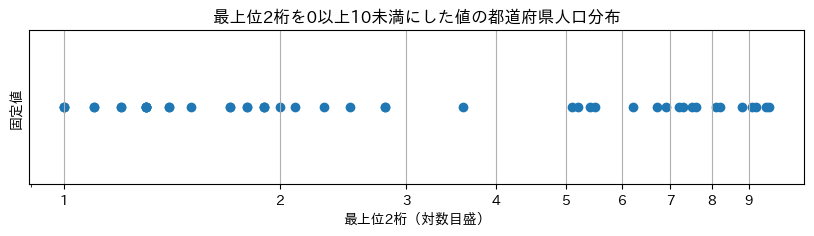

In [20]:
# グラフで日本語表示をするライブラリをインストールする
!pip install japanize-matplotlib
import japanize_matplotlib

import matplotlib.pyplot as plt

# 都道府県の人口データから最上位2桁を抽出して1以上10未満の数に変換する関数
def extract_leading_two_digits(population):
    leading_digits = int(str(population)[:2])  # 最上位2桁を取り出す
    while leading_digits >= 10:  # 10未満になるまで割る
        leading_digits /= 10
    return leading_digits

# 仮の人口データ
prefectures_population = {
    "北海道": 5220000, "青森県": 1246000, "岩手県": 1227000, "宮城県": 2308000,
    "秋田県": 966000, "山形県": 1078000, "福島県": 1846000, "茨城県": 2867000,
    "栃木県": 1937000, "群馬県": 1943000, "埼玉県": 7334000, "千葉県": 6246000,
    "東京都": 13960000, "神奈川県": 9145000, "新潟県": 2177000, "富山県": 1049000,
    "石川県": 1138000, "福井県": 767000, "山梨県": 812000, "長野県": 2049000,
    "岐阜県": 1987000, "静岡県": 3650000, "愛知県": 7552000, "三重県": 1787000,
    "滋賀県": 1413000, "京都府": 2583000, "大阪府": 8804000, "兵庫県": 5461000,
    "奈良県": 1339000, "和歌山県": 925000, "鳥取県": 556000, "島根県": 673000,
    "岡山県": 1894000, "広島県": 2808000, "山口県": 1337000, "徳島県": 728000,
    "香川県": 956000, "愛媛県": 1338000, "高知県": 697000, "福岡県": 5104000,
    "佐賀県": 820000, "長崎県": 1324000, "熊本県": 1756000, "大分県": 1135000,
    "宮崎県": 1071000, "鹿児島県": 1592000, "沖縄県": 1473000
}

# 最上位2桁を1以上10未満の数に変換
transformed_data = {pref: extract_leading_two_digits(pop) for pref, pop in prefectures_population.items()}

# 横軸に最上位2桁を対数目盛で、縦軸の値を全て1としてプロット
x_values = list(transformed_data.values())
y_values = [1] * len(x_values)  # 縦軸の値を全て1に固定

# 描画
plt.figure(figsize=(10, 2))
plt.scatter(x_values, y_values)
plt.xscale('log')  # x軸を対数目盛に
plt.title('最上位2桁を0以上10未満にした値の都道府県人口分布')
plt.ylabel('固定値')
plt.xlabel('最上位2桁（対数目盛）')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], labels=["1", "2", "3", "4", "5", "6", "7", "8", "9"])  # 対数目盛のためのカスタムラベル
plt.yticks([])  # Y軸の目盛りを非表示に
plt.grid(True)
plt.show()


次に人口の代わりに都道府県面積でプロットを作成してみます．

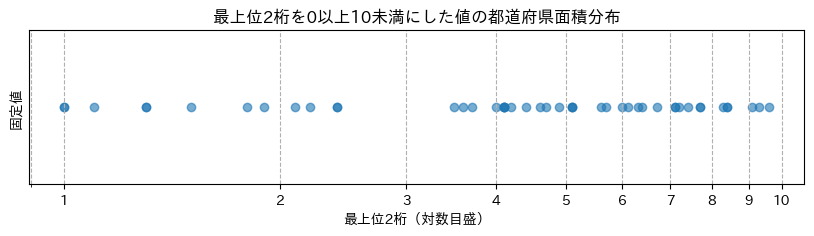

In [19]:
import matplotlib.pyplot as plt

# 日本の都道府県の面積データ (単位: 平方キロメートル)
prefecture_areas = {
    "北海道": 83424,
    "青森県": 9646,
    "岩手県": 15275,
    "宮城県": 7282,
    "秋田県": 11637,
    "山形県": 9323,
    "福島県": 13784,
    "茨城県": 6097,
    "栃木県": 6408,
    "群馬県": 6362,
    "埼玉県": 3798,
    "千葉県": 5158,
    "東京都": 2194,
    "神奈川県": 2416,
    "新潟県": 10364,
    "富山県": 4248,
    "石川県": 4186,
    "福井県": 4190,
    "山梨県": 4465,
    "長野県": 13561,
    "岐阜県": 10621,
    "静岡県": 7777,
    "愛知県": 5172,
    "三重県": 5776,
    "滋賀県": 4017,
    "京都府": 4612,
    "大阪府": 1905,
    "兵庫県": 8401,
    "奈良県": 3691,
    "和歌山県": 4725,
    "鳥取県": 3507,
    "島根県": 6708,
    "岡山県": 7114,
    "広島県": 8479,
    "山口県": 6112,
    "徳島県": 4147,
    "香川県": 1877,
    "愛媛県": 5676,
    "高知県": 7104,
    "福岡県": 4986,
    "佐賀県": 2441,
    "長崎県": 4105,
    "熊本県": 7409,
    "大分県": 5197,
    "宮崎県": 7735,
    "鹿児島県": 9186,
    "沖縄県": 2281
}

# 最上位2桁を取得し、1以上10未満の数とする
scaled_areas = {pref: int(str(area)[:2])/10 for pref, area in prefecture_areas.items()}

# プロットのデータ準備
x = list(scaled_areas.values())
y = [1] * len(scaled_areas)  # 縦軸の値を固定

# プロット作成
plt.figure(figsize=(10, 2))
plt.scatter(x, y, alpha=0.6)
plt.title('最上位2桁を0以上10未満にした値の都道府県面積分布')
plt.ylabel('固定値')
plt.xlabel('最上位2桁（対数目盛）')
plt.xscale('log')
plt.yticks([])  # Y軸のラベルは不要なので非表示
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.grid(True, which="both", ls="--")

plt.show()
